# End-to-end Machine Learning project

# Author: Ruba Al Omari

**Original Dataset Source: Cortez,Paulo. (2014). Student Performance. UCI Machine Learning Repository. https://doi.org/10.24432/C5TG7T.**


**Modified Dataset: Student Performance https://raw.githubusercontent.com/rubaomari/data/main/student/student-mat-modified-RA.csv**

# Student Performance Dataset Description

**Attributes for student-mat-modified-RA.csv dataset:**

1. school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)

2. sex - student's sex (binary: "F" - female or "M" - male)

3. age - student's age (numeric: from 15 to 22)

4. address - student's home address type (binary: "U" - urban or "R" - rural)

5. famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)

6. Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)

7. Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

8. Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

9. Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")

10. Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")

11. reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")

12. guardian - student's guardian (nominal: "mother", "father" or "other")

13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)

16. schoolsup - extra educational support (binary: yes or no)

17. famsup - family educational support (binary: yes or no)

18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

19. activities - extra-curricular activities (binary: yes or no)

20. nursery - attended nursery school (binary: yes or no)

21. higher - wants to take higher education (binary: yes or no)

22. internet - Internet access at home (binary: yes or no)

23. romantic - with a romantic relationship (binary: yes or no)

24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)

26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)

27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

29. health - current health status (numeric: from 1 - very bad to 5 - very good)

30. absences - number of school absences (numeric: from 0 to 93)

31. G1 - first period grade (numeric: from 0 to 20)

32. G2 - second period grade (numeric: from 0 to 20)

33. G3 - final grade (numeric: from 0 to 20, output target)


**Missing values:**
- Sex : 3
- Age: 3
- Family size: 7
- guardian: 262
- Study time: 3


# 1- Look at the big picture

### Frame the problem
1. Supervised learning – training examples are labeled.
2. A regression task – predict a value.
3. Batch learning 
    - Small data set
    - No continuous flow of data coming into the system
    - No need to adjust to changing data rapidly

### Look at the big picture
Predictions will be used to help inform student advisors of students at risk, and contact them to let them know of available support.

In [182]:
# Import libraries
# you can install missing library using pip install numpy 

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2- Load the data

Open the dataset using Pandas and load it into a DataFrame, which is the object Pandas uses to store tables of data.
Pandas uses two objects for storing datasets: the DataFrame and the Series. 
Series is used for datasets with only one column, and DataFrame is used for datasets of more than one column.

In [183]:
# Download the dataset
# If there is no separator, you can use df = pd.read_csv(url)
# If the dataset is on your local machine use df = pd.read_csv("datasets/student/student-mat-modified-RA.csv")
# If reading from UCI directly, some datasets are available thorugh the ucimlrepo (https://github.com/uci-ml-repo/ucimlrepo)

url = "https://raw.githubusercontent.com/rubaomari/data/main/student/student-mat-modified-RA.csv"
students = pd.read_csv(url, sep=',')

# Let's create a backup copy of the dataset
studnets_backup = students

## 2.1 Take a quick look at the data structure

Examine the number of rows, the number of columns, and columns labels in the dataset.

- When you use the pd.read_csv() function without specifying any arguments, Pandas assumes that the first row of the CSV file contains column headers.

- If your CSV file does not contain headers, you can explicitly specify this by setting the header argument to None. For example: df = pd.read_csv('data.csv', header=None)

- If your CSV file contains headers but they are not in the first row, you can specify which row to use as headers using the header argument. For example, if your header is in the second row: df = pd.read_csv('data.csv', header=1) 

- You can also provide your own custom column names using the names argument. This is useful if your CSV file doesn't have headers, and you want to provide meaningful column names. For example:

    custom_headers = ["A", "B", "C"]
    
    df = pd.read_csv('data.csv', header=None, names=custom_headers)

In [184]:
students

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,NaN,NaN,U,NaN,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,NaN,NaN,U,NaN,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,NaN,U,NaN,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16.0,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,GP,F,16.0,U,GT3,T,3,1,services,other,...,4,3,3,1,2,5,4,7,7,6
400,GP,F,15.0,R,LE3,T,2,2,health,services,...,4,1,3,1,3,4,2,8,9,8
401,GP,F,15.0,R,LE3,T,3,1,other,other,...,4,4,2,2,3,3,12,16,16,16
402,GP,M,16.0,U,GT3,T,3,1,other,other,...,4,3,2,1,1,5,0,13,15,15



#### Use head() to look at the first 5 rows, you can also choose to look at more than the first 5 rows using head(10).


In [185]:
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,NaN,NaN,U,NaN,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,NaN,NaN,U,NaN,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,NaN,U,NaN,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16.0,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


#### Use describe() method to see a summary of the numerical attributes.


Example: 25% of the students have an average age lower than 16, while 50% are lower than 17 and 75% are lower than 18.

In [186]:
students.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,401.000000,404.000000,404.000000,404.000000,401.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,16.668329,2.764851,2.514851,1.450495,2.062344,0.326733,3.935644,3.235149,3.106436,1.487624,2.301980,3.549505,5.646040,10.920792,10.732673,10.433168
std,1.277583,1.092111,1.087843,0.697407,0.862324,0.736957,0.902611,0.997094,1.105393,0.900700,1.290506,1.387654,7.941846,3.314554,3.749319,4.558197
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


#### Use info() to get a quick description of the data, the total number of rows, each attribute’s type, and the number of non-null values.

#### The original dataset in UCI doesn't have any missing values. I have randomly removed values so we can discuss what to do with missing data.

In [187]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      404 non-null    object 
 1   sex         401 non-null    object 
 2   age         401 non-null    float64
 3   address     404 non-null    object 
 4   famsize     397 non-null    object 
 5   Pstatus     404 non-null    object 
 6   Medu        404 non-null    int64  
 7   Fedu        404 non-null    int64  
 8   Mjob        404 non-null    object 
 9   Fjob        404 non-null    object 
 10  reason      404 non-null    object 
 11  guardian    133 non-null    object 
 12  traveltime  404 non-null    int64  
 13  studytime   401 non-null    float64
 14  failures    404 non-null    int64  
 15  schoolsup   404 non-null    object 
 16  famsup      404 non-null    object 
 17  paid        404 non-null    object 
 18  activities  404 non-null    object 
 19  nursery     404 non-null    o

#### For categorical data, use value_counts to show what categories exist and how many rows belong to each category

In [188]:
students["school"].value_counts()

school
GP    358
MS     46
Name: count, dtype: int64

## 2.2 Create a Test Set

Typically, you want to create the test set here, then explore and visualise the training data only to gain insights.
You will also typically prepare the data preprcosssing pipeline using training data only, and then apply the preprocessing on the test dataset.
However, in this demo, we will do the data cleaning and preprocessing on the whole dataset, then split into training and testing datasets right before training the model.


# 3. Explore and visualize the data to gain insights.


### 3.1 Plot a histogram of the data using hist()

The towers or bars of a histogram are called bins. The height of each bin shows how many values from that data fall into that range. 

Width of each bin is = (max value of data – min value of data) / total number of bins
    - age bin width = (22-15)/20 = 0.35

The default value of the number of bins to be created in a histogram is 10. However, we can change the size of bins using the parameter bins

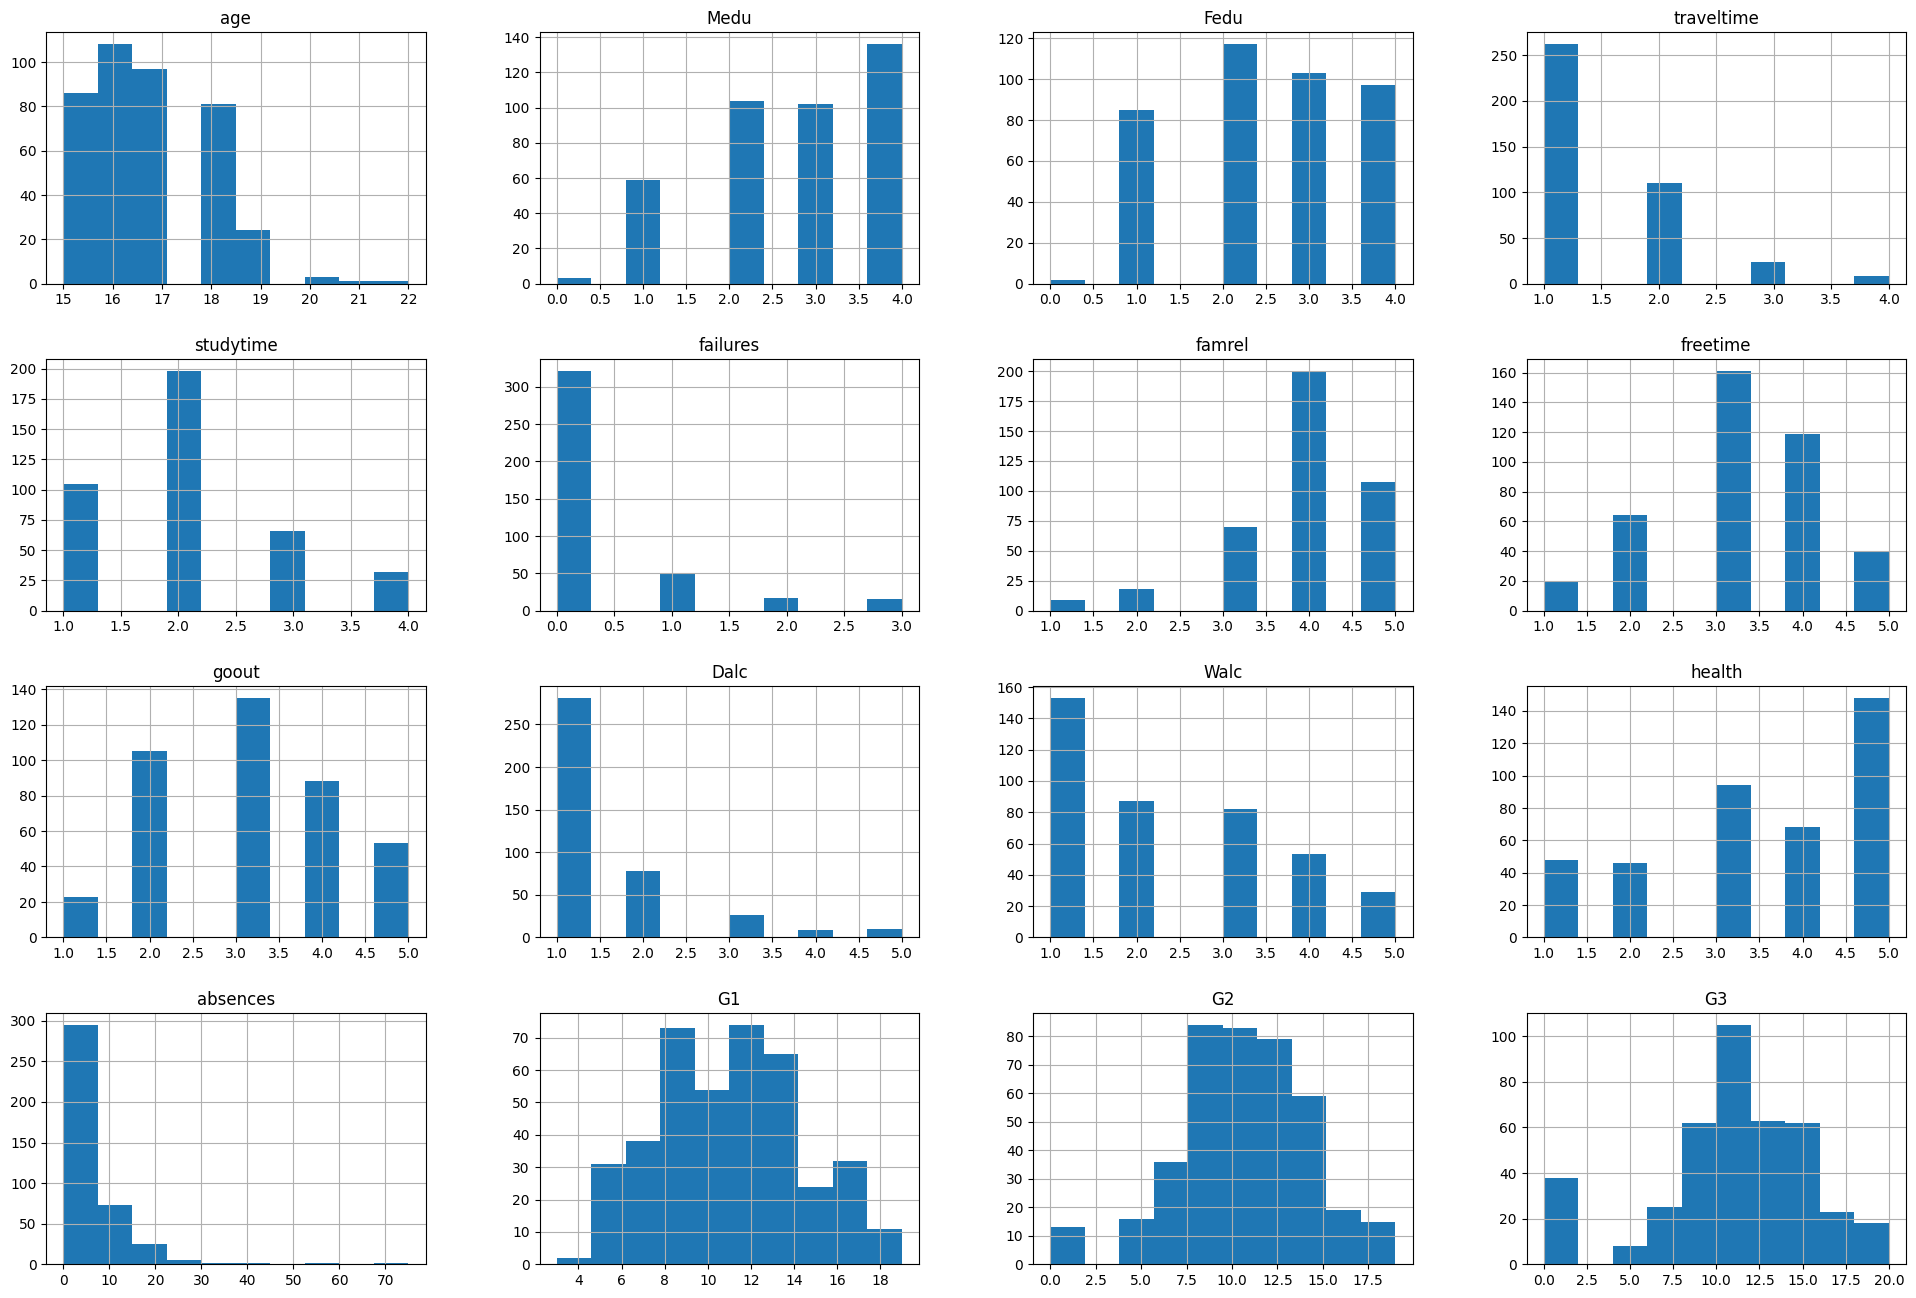

In [189]:
students.hist(figsize=(24, 16))
plt.show()

Try changing the number of bins

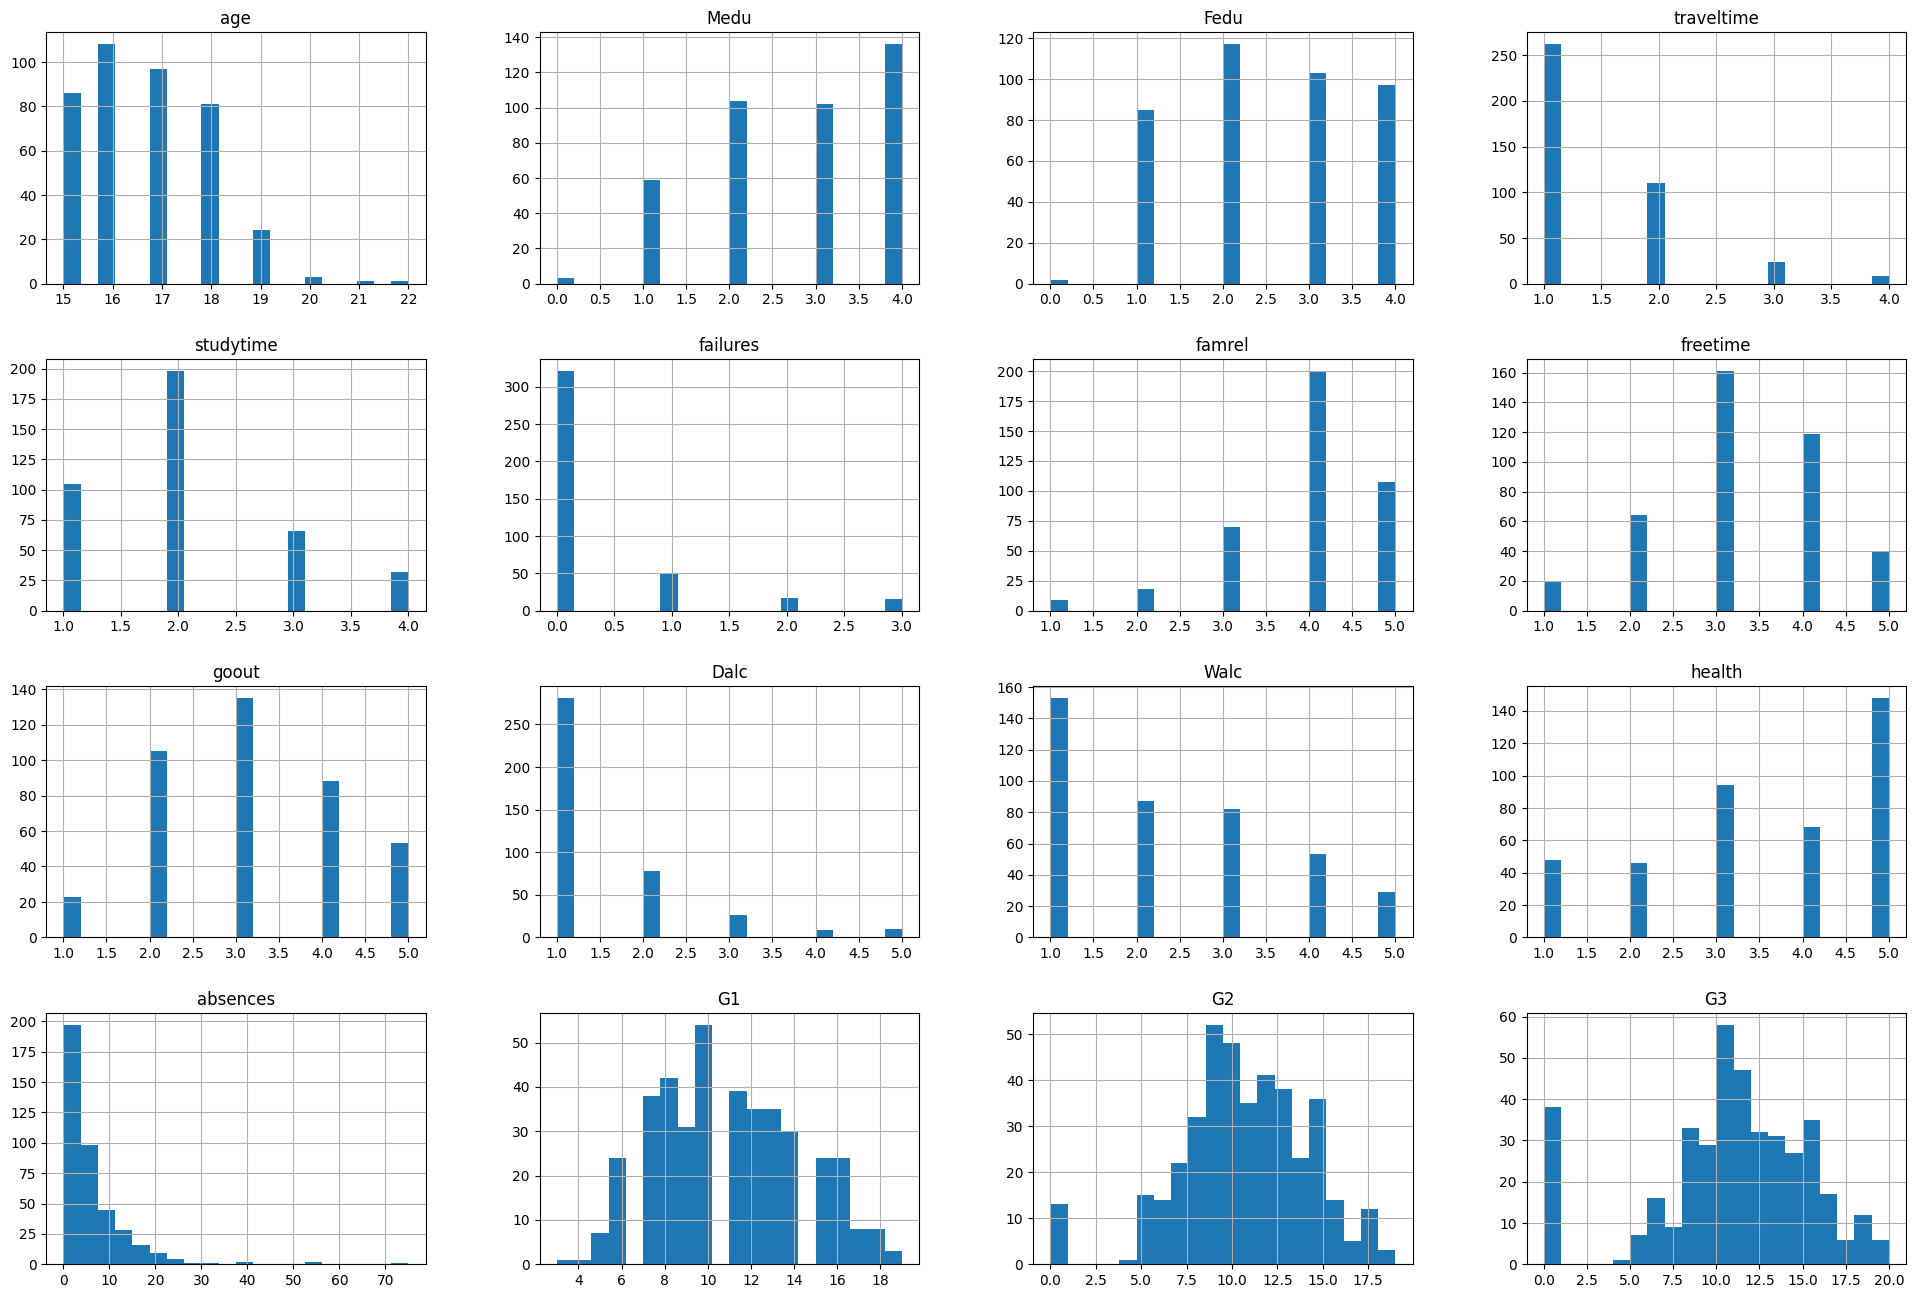

In [190]:
students.hist(bins=20, figsize=(24, 16))
plt.show()

#### Note that these attributes have very different scales. We will scale these attributes later.

## Look for correlations between the features

### 3.2 Check for correlation between attributes using sns.pairplot.

In [191]:
#Check for correlation between attributes using sns.pairplot.
sns.pairplot(students)

### 3.3 Look for correlations using pearson correlation coefficient 

In [192]:
corr_matrix = students.corr(numeric_only=True)
corr_matrix

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.182694,-0.164279,0.064501,-0.033376,0.268529,0.065006,0.018595,0.122406,0.119196,0.108774,-0.055342,0.181707,-0.064925,-0.144933,-0.160469
Medu,-0.182694,1.000000,0.615960,-0.170074,0.081952,-0.240359,-0.015390,0.039511,0.066004,0.031089,-0.037522,-0.055338,0.092515,0.207345,0.216104,0.217905
Fedu,-0.164279,0.615960,1.000000,-0.159293,-0.026656,-0.244397,-0.011660,-0.008947,0.051302,0.019182,0.000333,0.004443,0.023444,0.187513,0.159764,0.148075
traveltime,0.064501,-0.170074,-0.159293,1.000000,-0.100756,0.089485,-0.001132,-0.017118,0.021336,0.123456,0.124178,-0.000025,-0.012356,-0.077916,-0.137931,-0.104470
studytime,-0.033376,0.081952,-0.026656,-0.100756,1.000000,-0.183570,0.011807,-0.135952,-0.072478,-0.167645,-0.237188,-0.066313,-0.067296,0.161039,0.140111,0.101366
failures,0.268529,-0.240359,-0.244397,0.089485,-0.183570,1.000000,-0.039187,0.091042,0.124737,0.129471,0.136036,0.066643,0.066869,-0.352036,-0.354472,-0.359133
famrel,0.065006,-0.015390,-0.011660,-0.001132,0.011807,-0.039187,1.000000,0.149199,0.061597,-0.107809,-0.128132,0.089720,-0.040224,0.022345,-0.017561,0.051423
freetime,0.018595,0.039511,-0.008947,-0.017118,-0.135952,0.091042,0.149199,1.000000,0.283419,0.206328,0.147160,0.065992,-0.055268,0.022168,-0.007702,0.017388
goout,0.122406,0.066004,0.051302,0.021336,-0.072478,0.124737,0.061597,0.283419,1.000000,0.261770,0.419239,-0.012341,0.041895,-0.153462,-0.167945,-0.137709
Dalc,0.119196,0.031089,0.019182,0.123456,-0.167645,0.129471,-0.107809,0.206328,0.261770,1.000000,0.652199,0.068985,0.109871,-0.083446,-0.056091,-0.049158


#### Let's look at correlations with regard to our target

In [193]:
corr_matrix["G3"].sort_values(ascending=False)

G3            1.000000
G2            0.905981
G1            0.803600
Medu          0.217905
Fedu          0.148075
studytime     0.101366
famrel        0.051423
absences      0.035023
freetime      0.017388
Dalc         -0.049158
Walc         -0.051821
health       -0.066755
traveltime   -0.104470
goout        -0.137709
age          -0.160469
failures     -0.359133
Name: G3, dtype: float64

### 3.4 Plot G1 vs. G3 using sns.lineplot, and create a scatterplot for G2 and G3.

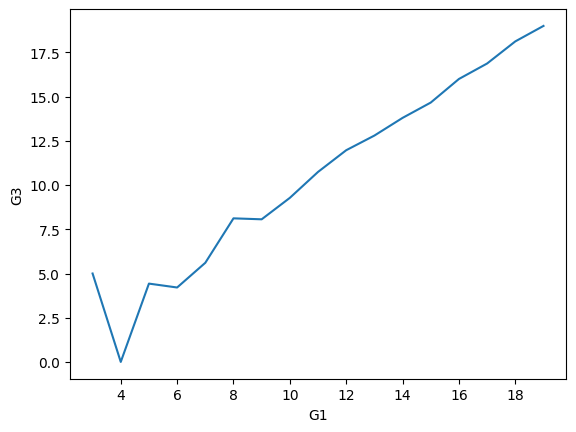

In [194]:
#plot G1 vs. G3

g = sns.lineplot(x="G1", y="G3", data=students, errorbar=None)

Text(0, 0.5, 'G3')

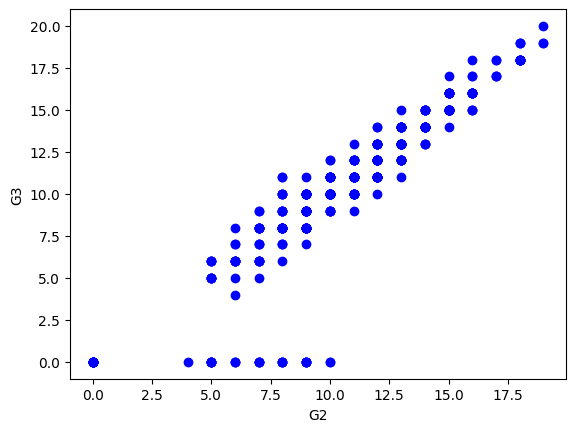

In [195]:
# Create a scatterplot of G2 and G3

X = students["G2"]
y = students["G3"]
# Plot points
fig, pl = plt.subplots()
pl.scatter(X, y, color = 'b')
plt.xlabel("G2")
plt.ylabel("G3")


# 4. Prepare the data for Machine Learning Algorithms

#### Let's start by cleaning up the data: duplicate and missing values and how to deal with them

### 4.1- Remove duplicate rows

In [196]:
# Check for duplicate rows and delete them
students.duplicated().sum()

9

In [197]:
# Remove duplicated
students.drop_duplicates(inplace=True)

### 4.2-Handle the missing values

In [199]:
# Find the number of missing values in each column

students.isna().sum()

school          0
sex             3
age             3
address         0
famsize         7
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
reason          0
guardian      262
traveltime      0
studytime       3
failures        0
schoolsup       0
famsup          0
paid            0
activities      0
nursery         0
higher          0
internet        0
romantic        0
famrel          0
freetime        0
goout           0
Dalc            0
Walc            0
health          0
absences        0
G1              0
G2              0
G3              0
dtype: int64

**Note** for many online datasets, you will find missing values are replaced by "?".

You can replace the "?" with NaN first then follow the same steps
(df.values == '?').sum()
df = df.replace('?', np.nan)
df.isna().sum()

#### For the guardian feature, we will delete the whole feature

**NOTE** You can also drop columns with a specific percent of missing values, for example the below command will drop columns that has 70% (or more) missing values

    - dataset.dropna(axis='columns', thresh=int(0.7* df.shape[0]))

In [200]:
# Dropping the guardian feature

students.drop(labels=['guardian'], axis=1, inplace=True)

#### For the famsize attribute we will delete the instances with null famsize values

In [203]:
students.dropna(subset=["famsize"], inplace=True)

#### For the remaining missing values, we will fill the mean if it is a numerical value and the most frequent if it is a categorical column.

#### We will do this through creating a pipeline, that will also scale the features and perform encoding in the next step.




### 4.3. Create a pipeline that will 

1. Fill in the missing numerical values with the mean using a SimpleImputer

2. Scale the numerical columns using StandardScaler. Do not scale the target

3. Fill in the missing categorical values with the most_frequent value using SimpleImputer

4. Encode the categorical columns using OneHotEncoder


In [206]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [207]:
#create the cat and num columns
num_cols = students.select_dtypes(include='number').columns.to_list()
cat_cols = students.select_dtypes(exclude='number').columns.to_list()


#exclude the target from numerical columns
num_cols.remove("G3")

#create pipelines for numeric and categorical columns
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

#use ColumnTransformer to set the estimators and transformations

preprocessing = ColumnTransformer([('num', num_pipeline, num_cols),
                                   ('cat', cat_pipeline, cat_cols)],
                                    remainder='passthrough'
                                 )

#### Display your pipeline

In [208]:
# Show the pipeline
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['age', 'Medu', 'Fedu', 'traveltime',
                                  'studytime', 'failures', 'famrel', 'freetime',
                                  'goout', 'Dalc', 'Walc', 'health', 'absences',
                                  'G1', 'G2']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['school', 'sex', 'address', 'famsize',
                                  'Pstatus', 'Mjob', 'Fjob', 'reason',
                                  'schoolsup', 'famsup', 'paid', 'activities',
                                  'nursery', 'higher', 'internet',
                                  'romantic'])])

In [209]:
# Apply the preprocessing pipeline on the dataset
students_prepared = preprocessing.fit_transform(students)

# Scikit-learn strips the column headers in most cases, so just add them back on afterward.
feature_names=preprocessing.get_feature_names_out()
students_prepared = pd.DataFrame(data=students_prepared, columns=feature_names)

students_prepared

,num__age,num__Medu,num__Fedu,num__traveltime,num__studytime,num__failures,num__famrel,num__freetime,num__goout,num__Dalc,...,cat__activities_yes,cat__nursery_no,cat__nursery_yes,cat__higher_no,cat__higher_yes,cat__internet_no,cat__internet_yes,cat__romantic_no,cat__romantic_yes,remainder__G3
0,-1.345509,1.145338,-0.480849,-0.644415,1.138131,-0.448662,-1.046318,-1.230494,-1.001491,-0.541286,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,15.0
1,-0.559278,0.227175,0.442762,-0.644415,-0.048952,-0.448662,0.065932,-0.235845,-1.001491,-0.541286,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,10.0
2,-0.559278,1.145338,0.442762,-0.644415,-0.048952,-0.448662,1.178183,0.758805,-1.001491,-0.541286,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,15.0
3,-0.559278,-0.690989,-0.480849,-0.644415,-0.048952,-0.448662,0.065932,0.758805,0.793329,-0.541286,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,11.0
4,0.226953,1.145338,1.366372,0.784346,-0.048952,-0.448662,0.065932,-2.225144,0.793329,-0.541286,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,2.585646,-0.690989,-0.480849,-0.644415,-0.048952,2.271350,1.178183,1.753454,0.793329,2.810079,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,9.0
384,0.226953,0.227175,-1.404459,0.784346,-1.236035,-0.448662,-2.158568,0.758805,1.690740,1.692958,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,16.0
385,3.371877,-1.609153,-1.404459,-0.644415,-1.236035,3.631357,1.178183,1.753454,-0.104081,1.692958,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,7.0
386,1.013184,0.227175,-0.480849,2.213106,-1.236035,-0.448662,0.065932,0.758805,-1.898902,1.692958,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,10.0


# 5. Select a model and train it

## 5.1 Split the dataset into a training dataset (80%) and testing dataset.

In [212]:
from sklearn.model_selection import train_test_split

X = students_prepared.drop(["remainder__G3"], axis=1)
y = students_prepared["remainder__G3"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(310, 55) (310,) (78, 55) (78,)


### 5.2 Train a Linear Regression model 

In [217]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train,y_train)



LinearRegression()

### Test your model on the test set, and report on the Mean Squared Error

In [214]:
# Predict the outcome of test data

lr_y_predict = lr_model.predict(X_test)

from sklearn.metrics import mean_squared_error as mse
lr_mse=mse(y_test, lr_y_predict)
lr_mse

4.143203588632437

### 5.3 Train a Linear Regression model using KFold cross-validation with 5 folds, and report on the cross validation score, use negative mean squared error as the cross validation metric.

In [218]:
from sklearn.model_selection import cross_val_score, KFold

scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

scores

array([-2.91241728, -3.80327199, -4.33055952, -5.22567454, -5.45568704])

### 5.4 Calculate the mean and standard deviation of the cross-validation scores to get an overall assessment of the model's performance:

In [219]:
mean_score = -scores.mean()  # Take the negative value to get the mean squared error

print(f'Cross-Validation Mean Score: {mean_score}')


Cross-Validation Mean Score: 4.345522073007399


**NOTE** cross_val_score in scikit-learn does allow you to use mean squared error (MSE) as a scoring metric. 

However, you should use 'neg_mean_squared_error' as the scoring parameter when you call cross_val_score. 

The reason for this naming convention is that cross_val_score follows a convention where greater values are better for scoring, while MSE is typically minimized (you want it to be as small as possible). 

To reconcile this, you use the negative MSE, which turns it into a maximizing score (higher is better).

Here's how you can use cross_val_score with negative mean squared error:

scores = cross_val_score(model, X, y, cv=5, scoring=make_scorer(mean_squared_error, greater_is_better=False))



### 5.5 Train a Linear Regression model using Ridge and Lasso regularization with alpha=1

In [177]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

RidgeRegression = Ridge(alpha=1)
ridge_model = RidgeRegression.fit(X_train, y_train)


LassoRegression = Lasso(alpha=1)
lasso_model = LassoRegression.fit(X_train, y_train)


### Test your models on the test dataset and report on the MSE

In [178]:
Ridge_y_predict = ridge_model.predict(X_test)
Lasso_y_predict = lasso_model.predict(X_test)
ridge_mse = mse(y_test, Ridge_y_predict)
lasso_mse=mse(y_test, Lasso_y_predict)

print(f'Ridge Regression MSE: {ridge_mse}')
print(f'Lasso Regression MSE: {lasso_mse}')

Ridge Regression MSE: 4.7727991836465735
Lasso Regression MSE: 5.428927512796546


Compare the results from all the models

In [179]:
print(f'Linear Regression MSE: {lr_mse}')
print(f'Cross-Validation Mean Score: {mean_score}')
print(f'Ridge Regression MSE: {ridge_mse}')
print(f'Lasso Regression MSE: {lasso_mse}')


Linear Regression MSE: 4.805093062229646
Cross-Validation Mean Score: 5.622036270249344
Ridge Regression MSE: 4.7727991836465735
Lasso Regression MSE: 5.428927512796546


### 5.6 Plot the prediction vs. actual for the best performing model

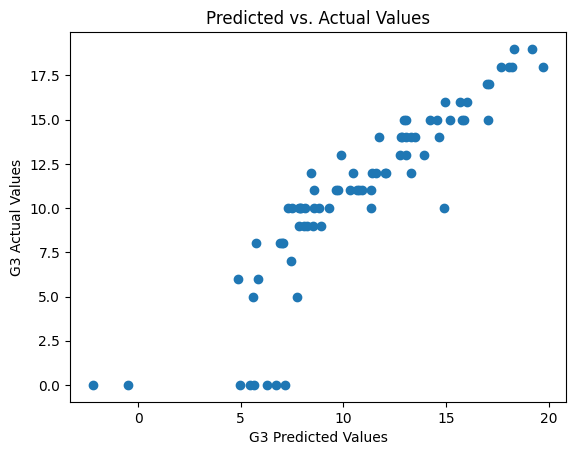

In [180]:
import matplotlib.pyplot as plt

# Assuming 'lr_model' is your best performing trained linear regression model
lr_y_predict = lr_model.predict(X_test)  # X is your feature data
plt.scatter(lr_y_predict, y_test)  # y is your actual target values
plt.xlabel("G3 Predicted Values")
plt.ylabel("G3 Actual Values")
plt.title("Predicted vs. Actual Values")
plt.show()

# Markdown for Jupyter notebooks cheatsheet

Source: https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet

Here's how to format Markdown cells in Jupyter notebooks:

Headings

Use the number sign (#) followed by a blank space for notebook titles and section headings:
# for titles
## for major headings
### for subheadings
#### for 4th level subheadings

### Emphasis

Use the following code to emphasize text:

Bold text: __string__ or **string**

Italic text: _string_ or *string*


### Bullets

To create a circular bullet point, use one of the following methods. Each bullet point must be on its own line.

A hyphen (-) followed by one or two spaces, for example: - Bulleted item

A space, a hyphen (-) and a space, for example: - Bulleted item

An asterisk (*) followed by one or two spaces, for example: * Bulleted item

## Numbered lists

To create a numbered list, enter 1. followed by a space, for example:
1. Numbered item
1. Numbered item

For simplicity, you use 1. before each entry. The list will be numbered correctly when you run the cell.

